Customer segmentation using clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\srine\Downloads\Machine learning learning\archive (7)\Mall_Customers.csv")

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
#selecting useful features
X = df[['Age', 'Annual Income (k$)'	, 'Spending Score (1-100)']]

In [7]:
#scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Using Elbow methos find cluster k
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters= k, init='k-means++' , random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

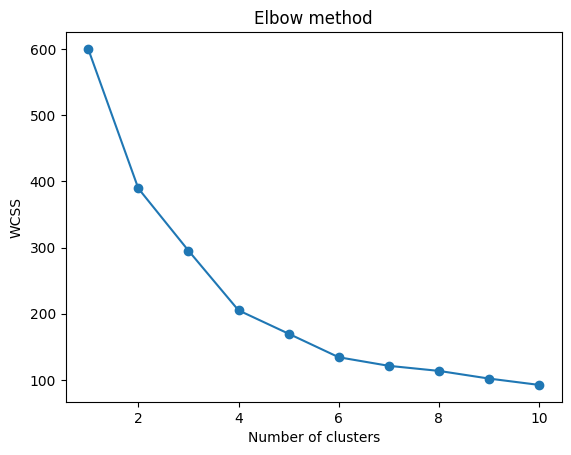

In [9]:
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Apply k-means with chosen k
kmeans= KMeans(n_clusters=5, init= 'k-means++', random_state=42)
cluster = kmeans.fit_predict(X_scaled) 

In [11]:
df["Cluster"]=cluster

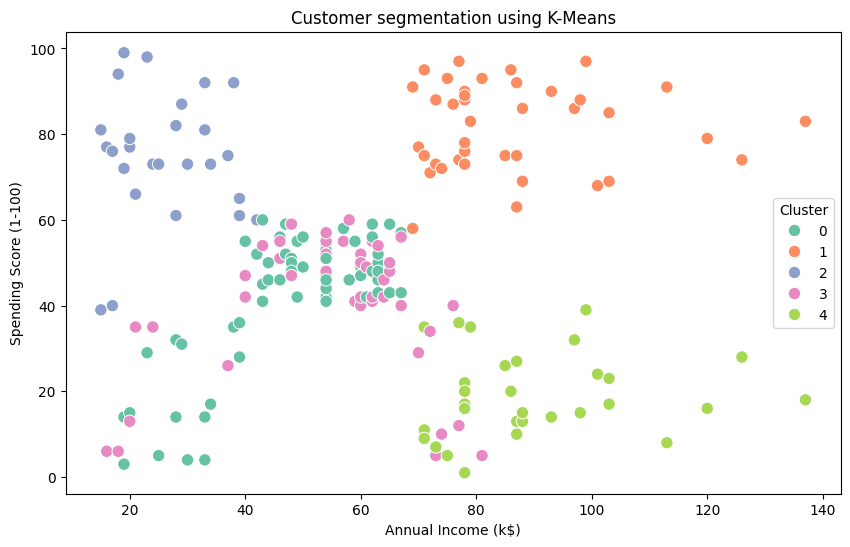

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


In [18]:
#Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)',
    hue ='Cluster', palette='Set2', s=80
)
plt.title('Customer segmentation using K-Means')
plt.show()

#Dsiplay cluster charaterstics 
print(df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean())